# Predicting Deflection

In [25]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Data Collection

In [ ]:
# Read data into dataframe
data = pd.read_csv(r"C:\Users\akink\OneDrive - Solent University\Desktop\EVERYTHING_PROJECT\DATASET__DEFLECTION.csv")
data.head()

,Moment of inertia(cm^4),Span Length (m),Modulus of Elasticity(Gpa),Point Load(KN),Stiffness(KNm^2),δ = Deflection(m)
0,120,6.1,200,18.44,100,0.01
1,125,6.1,210,18.44,90,0.02
2,130,6.1,200,18.44,110,0.02
3,140,6.1,190,18.44,105,0.03
4,145,6.1,195,18.44,70,0.02


# Exploratory Data Analysis and Data Preprocessing

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3561 entries, 0 to 3560
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Moment of inertia(cm^4)     3561 non-null   int64  
 1   Span Length (m)             3561 non-null   float64
 2   Modulus of Elasticity(Gpa)  3561 non-null   int64  
 3   Point Load(KN)              3561 non-null   float64
 4   Stiffness(KNm^2)            3561 non-null   int64  
 5   δ = Deflection(m)           3561 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 167.0 KB


In [ ]:
data.describe()

,Moment of inertia(cm^4),Span Length (m),Modulus of Elasticity(Gpa),Point Load(KN),Stiffness(KNm^2),δ = Deflection(m)
count,3561.000000,3561.000000,3561.000000,3561.000000,3561.000000,3561.000000
mean,133.093232,3.740233,154.759056,9.056164,82.925302,0.016276
std,20.324689,1.342811,38.376957,7.498818,26.829665,0.017159
min,110.000000,1.830000,104.000000,0.940000,25.000000,0.000000
25%,116.000000,3.050000,120.000000,3.500000,55.000000,0.010000
50%,125.000000,3.500000,156.000000,4.440000,90.000000,0.010000
75%,155.000000,3.810000,185.000000,13.750000,110.000000,0.020000
max,170.000000,6.400000,240.000000,31.490000,118.000000,0.090000


# Feature importance

In [ ]:
data.columns

Index(['Moment of inertia(cm^4)', 'Span Length (m)',
       'Modulus of Elasticity(Gpa)', 'Point Load(KN)', 'Stiffness(KNm^2)',
       'δ = Deflection(m)'],
      dtype='object')

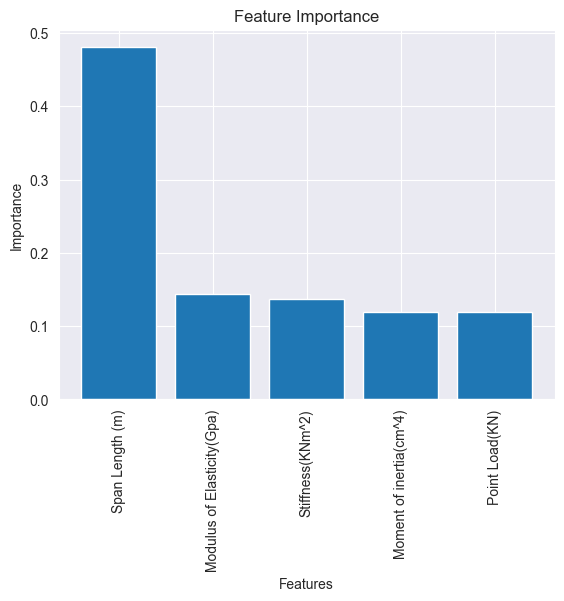

In [ ]:
# Extract the input features and target variable
X = data[['Span Length (m)', 'Point Load(KN)', 'Modulus of Elasticity(Gpa)', 'Moment of inertia(cm^4)', 'Stiffness(KNm^2)',]]
y = data['δ = Deflection(m)']

# Create and fit the random forest regressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X, y)

# Get feature importances
importances = rf_model.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]

# Get the names of the features in the original order
feature_names = X.columns[sorted_indices]

# Plot feature importances
plt.bar(range(len(sorted_importances)), sorted_importances, tick_label=feature_names)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=90)
plt.show()

# Visualizations

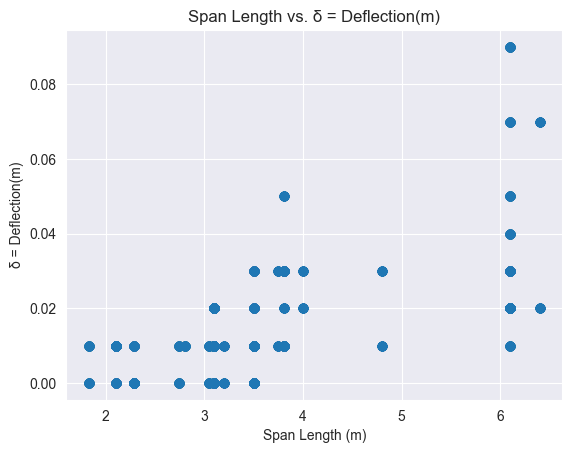

In [ ]:
# to check the relationship between span length of the beam and deflection
# Scatter plot of span length vs. deflection
plt.scatter(data['Span Length (m)'], data['δ = Deflection(m)'])
plt.xlabel('Span Length (m)')
plt.ylabel('δ = Deflection(m)')
plt.title('Span Length vs. δ = Deflection(m)')
plt.show()

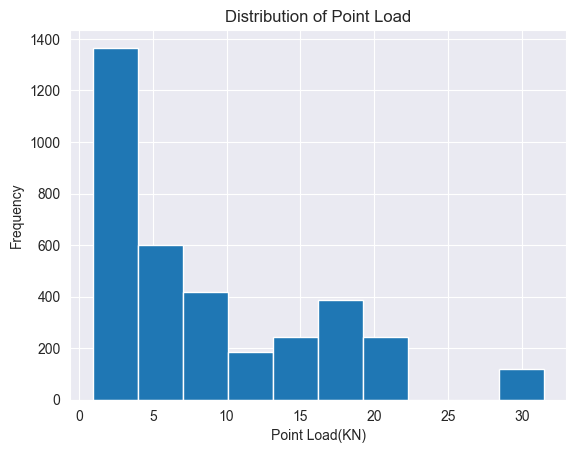

In [ ]:
# to check for distribution of the point load
# Histogram of point load
plt.hist(data['Point Load(KN)'], bins=10)
plt.xlabel('Point Load(KN)')
plt.ylabel('Frequency')
plt.title('Distribution of Point Load')
plt.show()


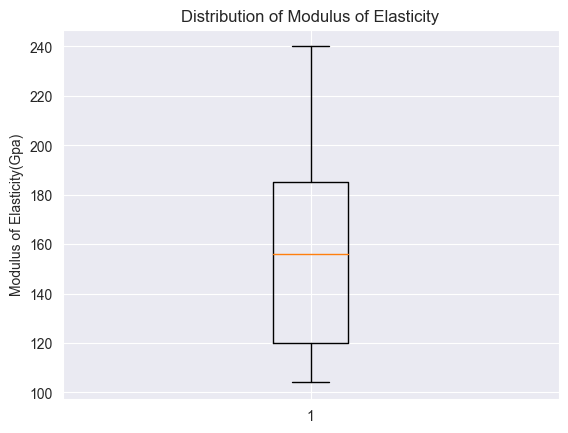

In [ ]:
# Box plot of modulus of elasticity
plt.boxplot(data['Modulus of Elasticity(Gpa)'])
plt.ylabel('Modulus of Elasticity(Gpa)')
plt.title('Distribution of Modulus of Elasticity')
plt.show()


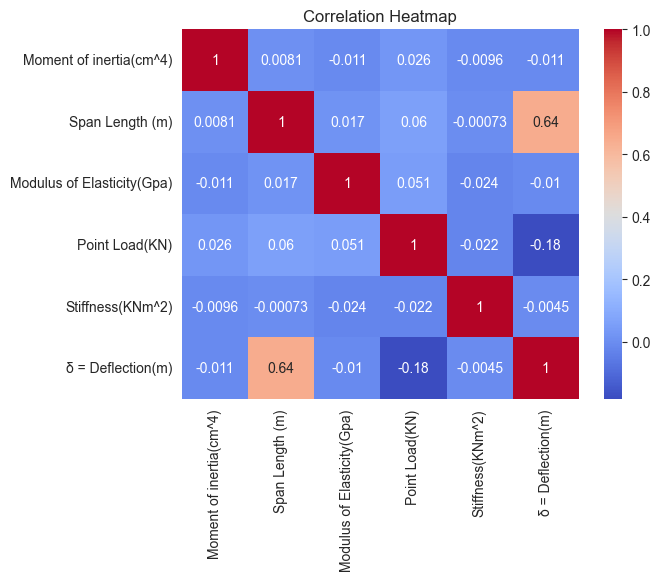

In [ ]:
# Correlation heatmap
import seaborn as sns
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


C:\Users\akink\OneDrive - Solent University\Desktop\EVERYTHING_PROJECT\pythonProject1\ven\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


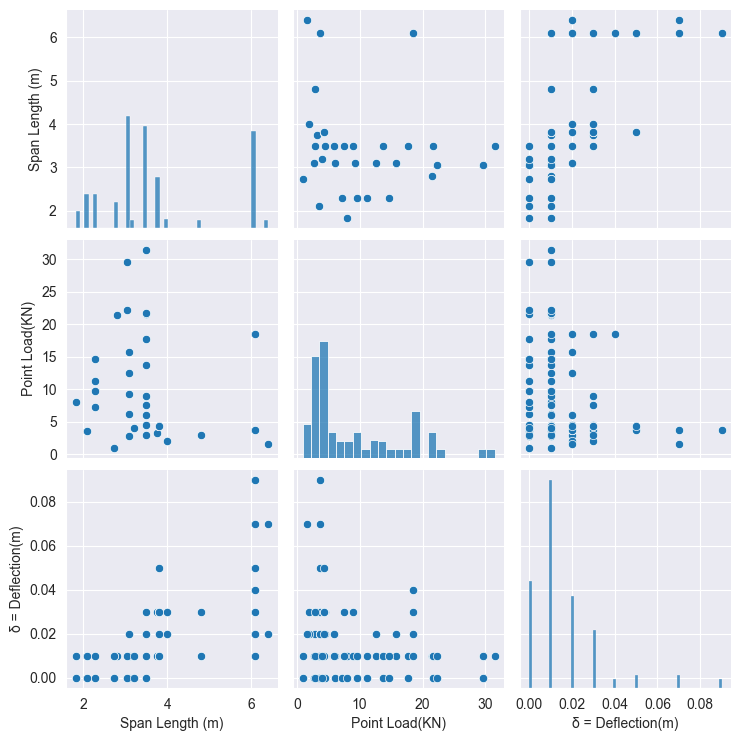

In [ ]:
import seaborn as sns
# Pairwise scatter plots of selected columns
sns.pairplot(data[['Span Length (m)', 'Point Load(KN)', 'δ = Deflection(m)']])
plt.show()

# Model Building: Multiple Linear Regression

In [16]:
# Extract the input features and target variable
X = data[['Span Length (m)', 'Point Load(KN)', 'Modulus of Elasticity(Gpa)', 'Moment of inertia(cm^4)', 'Stiffness(KNm^2)']]
y = data['δ = Deflection(m)']

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
# Create and fit the linear regression model
regression_model = LinearRegression()
regression_model.fit(X_train,y_train)

LinearRegression()

In [20]:
# Predict deflection for the test data
y_pred = regression_model.predict(X_test)

In [21]:
regression_model.score(X_train,y_train)

0.4616029642463274

In [22]:
regression_model.score(X_test,y_test)

0.4698394005579537

In [23]:
# Evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [27]:
# Print the evaluation metrics
print("Evaluation Metrics:")
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R^2 Score (Coefficient of Determination):", r2)


Evaluation Metrics:
Root Mean Squared Error (RMSE): 0.01244639166216106
Mean Absolute Error (MAE): 0.009237101630065376
R^2 Score (Coefficient of Determination): 0.4698394005579537


# Carrying out feature engineering to improve the accuracy of the model

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [29]:
# Load the data from a pandas DataFrame
data = pd.read_csv(r"C:\Users\akink\OneDrive - Solent University\Desktop\EVERYTHING_PROJECT\DATASET__DEFLECTION.csv")

In [31]:
# Extract the input features and target variable
X = data[['Span Length (m)', 'Point Load(KN)', 'Modulus of Elasticity(Gpa)', 'Moment of inertia(cm^4)', 'Stiffness(KNm^2)']]
y = data['δ = Deflection(m)']

In [32]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Create a pipeline with feature scaling, polynomial features, and linear regression
model = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=2),
    LinearRegression()
)

In [34]:
# Fit the model to the training data
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [35]:
# Predict deflection for the test data
y_pred = model.predict(X_test)

In [36]:
model.score(X_train,y_train)

0.5086415658933392

In [37]:
model.score(X_test,y_test)

0.5393855317928679

In [38]:
# Evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [40]:
# Print the evaluation metrics
print("Evaluation Metrics:")
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R^2 Score (Coefficient of Determination):", r2)

Evaluation Metrics:
Root Mean Squared Error (RMSE): 0.011779503411307306
Mean Absolute Error (MAE): 0.008504418301595993
R^2 Score (Coefficient of Determination): 0.5393855317928679


# Model Building: Random Forest Regressor

In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [42]:
# Load the data from a pandas DataFrame
data = pd.read_csv(r"C:\Users\akink\OneDrive - Solent University\Desktop\EVERYTHING_PROJECT\DATASET__DEFLECTION.csv")

In [43]:
# Extract the input features and target variable
X = data[['Span Length (m)', 'Point Load(KN)', 'Modulus of Elasticity(Gpa)', 'Moment of inertia(cm^4)', 'Stiffness(KNm^2)']]
y = data['δ = Deflection(m)']

In [62]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [63]:
# Create and fit the Random Forest Regression model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [64]:
# Predict deflection for the test data
y_pred = rf_model.predict(X_test)

In [65]:
rf_model.score(X_train,y_train)

0.9164019618186241

In [66]:
rf_model.score(X_test,y_test)

0.522052031025577

In [70]:
# Evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [71]:
# Print the evaluation metrics
print("Random Forest Regression Evaluation Metrics:")
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R^2 Score (Coefficient of Determination):", r2)

Random Forest Regression Evaluation Metrics:
Root Mean Squared Error (RMSE): 0.011913378958965938
Mean Absolute Error (MAE): 0.008239123376623378
R^2 Score (Coefficient of Determination): 0.522052031025577


# Hyperparameter Tuning: Random Forest Regressor for predicting Deflection

In [72]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [73]:
# Load the data into a pandas DataFrame
data = pd.read_csv(r"C:\Users\akink\OneDrive - Solent University\Desktop\EVERYTHING_PROJECT\DATASET__DEFLECTION.csv")

In [75]:
# Extract the input features and target variable
X = data[['Span Length (m)', 'Point Load(KN)', 'Modulus of Elasticity(Gpa)', 'Moment of inertia(cm^4)', 'Stiffness(KNm^2)']]
y = data['δ = Deflection(m)']

In [76]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
# Create a Random Forest Regression model
rf_model = RandomForestRegressor(random_state=42)

In [80]:
# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [90]:
# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(rf_model, param_distributions=param_grid, n_iter=50,
                                   scoring='r2', cv=5, random_state=42)

In [91]:
# Fit the randomized search to the training data
random_search.fit(X_train, y_train)

C:\Users\akink\OneDrive - Solent University\Desktop\EVERYTHING_PROJECT\pythonProject1\ven\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
90 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\akink\OneDrive - Solent University\Desktop\EVERYTHING_PROJECT\pythonProject1\ven\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\akink\OneDrive - Solent University\Desktop\EVERYTHING_PROJECT\pythonProject1\ven\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=50,
                   param_distributions={'max_depth': [None, 10, 20],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='r2')

In [92]:
# Get the best model and its hyperparameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_

In [93]:
# Predict deflection for the test data using the best model
y_pred = best_model.predict(X_test)

In [94]:
best_model.score(X_train,y_train)

0.6597504641208242

In [95]:
best_model.score(X_test,y_test)

0.5642703345173641

In [96]:
# Evaluate the model's performance using R2 score
r2 = r2_score(y_test, y_pred)

In [97]:
# Print the best hyperparameters and the R2 score
print("Best Hyperparameters:", best_params)
print("R^2 Score (Coefficient of Determination):", r2)

Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 10}
R^2 Score (Coefficient of Determination): 0.5642703345173641


# Predicting Deflection using Support Vector Regression

In [99]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [100]:
# Load the data into a pandas DataFrame
data = pd.read_csv(r"C:\Users\akink\OneDrive - Solent University\Desktop\EVERYTHING_PROJECT\DATASET__DEFLECTION.csv")

In [101]:
# Extract the input features and target variable
X = data[['Span Length (m)', 'Point Load(KN)', 'Modulus of Elasticity(Gpa)', 'Moment of inertia(cm^4)', 'Stiffness(KNm^2)']]
y = data['δ = Deflection(m)']

In [102]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
# Create and fit the Support Vector Regression model
svr_model = SVR(kernel='linear')
svr_model.fit(X_train, y_train)

SVR(kernel='linear')

In [110]:
# Predict deflection for the test data
y_pred = svr_model.predict(X_test)

In [112]:
svr_model.score(X_train,y_train)

-2.803483834851738

In [113]:
svr_model.score(X_test,y_test)

-2.802040617098857

In [114]:
# Evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)

In [115]:
# Print the evaluation metrics
print("Evaluation Metrics:")
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R^2 Score (Coefficient of Determination):", r2)

Evaluation Metrics:
Root Mean Squared Error (RMSE): 0.03384282207338216
Mean Absolute Error (MAE): 0.032223001402524536
Mean Absolute Percentage Error (MAPE): inf
R^2 Score (Coefficient of Determination): -2.802040617098857


In [116]:
import numpy as np
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [124]:
data= data[['Span Length (m)', 'δ = Deflection(m)']]
X = np.array(data['Span Length (m)'])
y = np.array(data['δ = Deflection(m)'])
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
svr_rbf = SVR(kernel='poly', C=1e3, gamma=0.0001)
svr_rbf.fit(x_train, y_train)
svm_prediction = svr_rbf.predict(x_test)

C:\Users\akink\OneDrive - Solent University\Desktop\EVERYTHING_PROJECT\pythonProject1\ven\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [121]:
svr_rbf.score(X_train,y_train)

C:\Users\akink\OneDrive - Solent University\Desktop\EVERYTHING_PROJECT\pythonProject1\ven\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


ValueError: X has 5 features, but SVR is expecting 1 features as input.

In [120]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, svm_prediction))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, svm_prediction)))

Mean Absolute Error: 0.032054698457222995
Root Mean Squared Error: 0.03369329946996154


In [ ]:
svr_rbf = SVR(kernel='rbf', C=1e5, gamma=0.0000000001)
svr_rbf.fit(x_train, y_train)
svm_prediction = svr_rbf.predict(x_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, svm_prediction))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, svm_prediction)))
